<a href="https://colab.research.google.com/github/SFStefenon/WBF-HE-YOLO/blob/main/YOLOv8_Optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Warm-up

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)
!pip install ultralytics==8.0.20
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Standard YOLOv8

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/yolov8

import time
start = time.time()

!yolo task=detect mode=train model=yolov8n.pt data=insulator.yaml epochs=10 imgsz=640 plots=True show=True

end = time.time()
time_s = end - start 
print(f'Time (s): {time_s} seconds')

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/yolov8'
/content/drive/MyDrive/Colab Notebooks/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=insulator.yaml, epochs=2, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=True, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

# Optuna (Hyperparameters Optimization)

In [4]:
!pip install -q optuna
import optuna
import re
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 9.5 MB/s eta 0:00:00


# Experiment 1

In [8]:
def attention(work, bat, drop):
  %cd /content/drive/MyDrive/Colab/yolov8/
  results = !yolo task=detect mode=train model=yolov8n.pt epochs=5 workers=$work batch=$bat dropout=$drop data=insulator.yaml imgsz=640

  # Optimize the model based on the loss function
  diretorio = results[-1].split(' ')
  dir_output = diretorio[-1]
  dir_output = re.sub(r'\x1b\[([0-9]{1,2}(;[0-9]{1,2})?)?[m|K]', '', dir_output)
  %cd $dir_output
  results = np.loadtxt('results.csv', delimiter=",", dtype=np.float32, skiprows=1)
  loss = results[-1][6]
  loss = float(loss)
  return loss

# Define the range of the variation
def objective(trial):
  work = trial.suggest_categorical('Workers', [2, 4, 8, 16, 32])
  bat = trial.suggest_categorical('Batch Size', [2, 4, 8, 16, 32])
  drop = trial.suggest_float('Dropout', 0, 0.3)
  erro = attention(work, bat, drop)
  return erro

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)
study.best_params

[I 2023-04-01 08:52:47,743] A new study created in memory with name: no-name-5f8bd268-0896-43e6-9f8f-0a095396eadf


/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 08:55:17,308] Trial 0 finished with value: 0.9932699799537659 and parameters: {'Workers': 4, 'Batch Size': 2, 'Dropout': 0.08903011746744878}. Best is trial 0 with value: 0.9932699799537659.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train19
0.99327
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 08:57:24,244] Trial 1 finished with value: 0.982509970664978 and parameters: {'Workers': 4, 'Batch Size': 16, 'Dropout': 0.07012924073232407}. Best is trial 0 with value: 0.9932699799537659.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train20
0.98251
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 08:59:31,365] Trial 2 finished with value: 0.9950000047683716 and parameters: {'Workers': 8, 'Batch Size': 8, 'Dropout': 0.07770662857690563}. Best is trial 2 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train21
0.995
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 09:01:36,317] Trial 3 finished with value: 0.982509970664978 and parameters: {'Workers': 4, 'Batch Size': 16, 'Dropout': 0.05779075786236099}. Best is trial 2 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train22
0.98251
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 09:03:54,889] Trial 4 finished with value: 0.9397600293159485 and parameters: {'Workers': 8, 'Batch Size': 32, 'Dropout': 0.24465494442846863}. Best is trial 2 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train23
0.93976


{'Workers': 8, 'Batch Size': 8, 'Dropout': 0.07770662857690563}

In [9]:
optuna.visualization.plot_param_importances(study)

In [10]:
optuna.visualization.plot_contour(study, params=['Workers', 'Batch Size', 'Dropout'])

<ipython-input-11-475a83b9070c>:1: ExperimentalWarning:

plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Parallel Coordinate Plot'}>

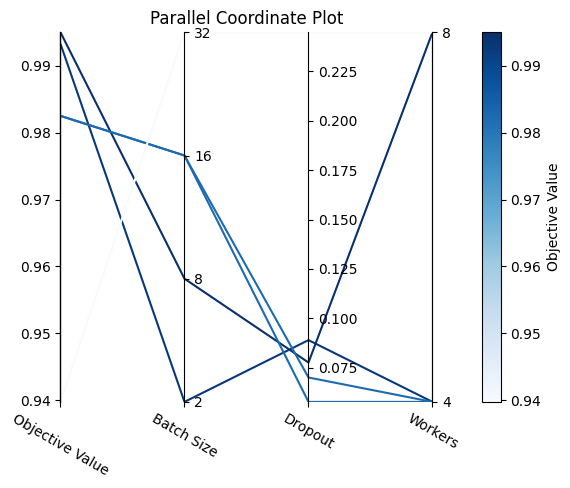

In [11]:
optuna.visualization.matplotlib.plot_parallel_coordinate(study, params=['Workers', 'Batch Size', 'Dropout'])

# Experiment 2


In [28]:
def attention(model_opt, dnn, aug):
  %cd /content/drive/MyDrive/Colab/yolov8/
  if model_opt == 'yolov8n.pt':
    results = !yolo task=detect mode=train model=yolov8n.pt epochs=2 augment=$aug dnn=$dnn data=insulator.yaml imgsz=640 workers=16 batch=8 dropout=0.25453413174523265
  elif model_opt == 'yolov8s.pt':
    results = !yolo task=detect mode=train model=yolov8s.pt epochs=2 augment=$aug dnn=$dnn data=insulator.yaml imgsz=640 workers=16 batch=8 dropout=0.25453413174523265
  elif model_opt == 'yolov8m.pt':
    results = !yolo task=detect mode=train model=yolov8m.pt epochs=2 augment=$aug dnn=$dnn data=insulator.yaml imgsz=640 workers=16 batch=8 dropout=0.25453413174523265 
  elif model_opt == 'yolov8l.pt':
    results = !yolo task=detect mode=train model=yolov8l.pt epochs=2 augment=$aug dnn=$dnn data=insulator.yaml imgsz=640 workers=16 batch=8 dropout=0.25453413174523265
  elif model_opt == 'yolov8x.pt':
    results = !yolo task=detect mode=train model=yolov8x.pt epochs=2 augment=$aug dnn=$dnn data=insulator.yaml imgsz=640 workers=16 batch=8 dropout=0.25453413174523265

  # Optimize the model based on the loss function
  diretorio = results[-1].split(' ')
  dir_output = diretorio[-1]
  dir_output = re.sub(r'\x1b\[([0-9]{1,2}(;[0-9]{1,2})?)?[m|K]', '', dir_output)
  %cd $dir_output
  results=np.loadtxt('results.csv', delimiter=",", dtype=np.float32, skiprows=1)
  loss = results[-1][6]
  loss = float(loss)
  return loss

# Define the range of the variation
def objective(trial):
  model_opt = trial.suggest_categorical('Model', ['yolov8n.pt', 'yolov8s.pt', 'yolov8m.pt', 'yolov8l.pt', 'yolov8x.pt',])
  dnn = trial.suggest_categorical('DNN', [True, False])
  aug = trial.suggest_categorical('Augment Data', [True, False])
  erro = attention(model_opt, dnn, aug)
  return erro

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-04-01 10:41:58,564] A new study created in memory with name: no-name-0d80a939-1f71-44ef-881e-67a1e4e2f721


/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 10:43:14,972] Trial 0 finished with value: 0.9950000047683716 and parameters: {'Model': 'yolov8m.pt', 'DNN': False, 'Augment Data': True}. Best is trial 0 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train39
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 10:44:49,899] Trial 1 finished with value: 0.9944700002670288 and parameters: {'Model': 'yolov8x.pt', 'DNN': True, 'Augment Data': False}. Best is trial 0 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train40
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 10:46:08,146] Trial 2 finished with value: 0.9950000047683716 and parameters: {'Model': 'yolov8m.pt', 'DNN': True, 'Augment Data': True}. Best is trial 0 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train41
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 10:47:32,259] Trial 3 finished with value: 0.9950000047683716 and parameters: {'Model': 'yolov8l.pt', 'DNN': True, 'Augment Data': False}. Best is trial 0 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train42
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 10:48:41,823] Trial 4 finished with value: 0.9941999912261963 and parameters: {'Model': 'yolov8s.pt', 'DNN': False, 'Augment Data': False}. Best is trial 0 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train43
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 10:49:47,065] Trial 5 finished with value: 0.8751500248908997 and parameters: {'Model': 'yolov8n.pt', 'DNN': True, 'Augment Data': False}. Best is trial 0 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train44
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 10:51:00,630] Trial 6 finished with value: 0.9950000047683716 and parameters: {'Model': 'yolov8m.pt', 'DNN': True, 'Augment Data': False}. Best is trial 0 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train45
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 10:52:09,085] Trial 7 finished with value: 0.9941999912261963 and parameters: {'Model': 'yolov8s.pt', 'DNN': True, 'Augment Data': False}. Best is trial 0 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train46
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 10:53:43,708] Trial 8 finished with value: 0.9944700002670288 and parameters: {'Model': 'yolov8x.pt', 'DNN': True, 'Augment Data': False}. Best is trial 0 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train47
/content/drive/MyDrive/Colab/yolov8


[I 2023-04-01 10:54:50,866] Trial 9 finished with value: 0.8751500248908997 and parameters: {'Model': 'yolov8n.pt', 'DNN': False, 'Augment Data': False}. Best is trial 0 with value: 0.9950000047683716.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train48


{'Model': 'yolov8m.pt', 'DNN': False, 'Augment Data': True}

In [29]:
optuna.visualization.plot_param_importances(study)

In [30]:
optuna.visualization.plot_contour(study, params=["Model", "DNN", "Augment Data"])

<ipython-input-31-868c6390aa75>:1: ExperimentalWarning:

plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Parallel Coordinate Plot'}>

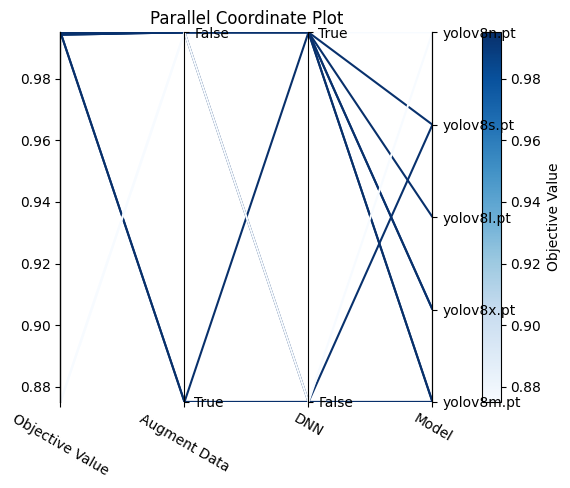

In [31]:
optuna.visualization.matplotlib.plot_parallel_coordinate(study, params=["Model", "DNN", "Augment Data"])

# Experiment 3

**Optimizer, Momentum, Learning Rate**

In [ ]:
def attention(opt, momen, learning_rate):
  %cd /content/drive/MyDrive/Colab/yolov8/
  results = !yolo task=detect mode=train model=yolov8x.pt epochs=5 optimizer=$opt momentum=$momen lr0=$learning_rate workers=16 batch=8 dropout=0.25453413174523265 data=insulator.yaml imgsz=640

  # Optimize the model based on the loss function
  diretorio = results[-1].split(' ')
  dir_output = diretorio[-1]
  dir_output = re.sub(r'\x1b\[([0-9]{1,2}(;[0-9]{1,2})?)?[m|K]', '', dir_output)
  %cd $dir_output
  results=np.loadtxt('results.csv', delimiter=",", dtype=np.float32, skiprows=1)
  loss = results[-1][6]
  loss = float(loss)
  return loss

# Define the range of the variation
def objective(trial):
  opt = trial.suggest_categorical("Optimizer", ['SGD', 'Adam', 'AdamW'])
  momen = trial.suggest_float('Momentum', 0.85, 0.95)
  learning_rate = trial.suggest_float('Learning Rate', 0.001, 0.1)
  erro = attention(opt, momen, learning_rate)
  return erro

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)
study.best_params

[I 2023-03-31 19:07:43,084] A new study created in memory with name: no-name-15b01ae2-6255-4efa-81d5-c0208d235b3b


/content/drive/MyDrive/Colab/yolov8


[I 2023-03-31 19:11:38,329] Trial 0 finished with value: 0.0 and parameters: {'Optimizer': 'AdamW', 'Momentum': 0.8767660626865892, 'Learning Rate': 0.09430112428813797}. Best is trial 0 with value: 0.0.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train12
/content/drive/MyDrive/Colab/yolov8


[I 2023-03-31 19:15:36,667] Trial 1 finished with value: 0.0 and parameters: {'Optimizer': 'AdamW', 'Momentum': 0.8812069407400284, 'Learning Rate': 0.09972448423044691}. Best is trial 0 with value: 0.0.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train13
/content/drive/MyDrive/Colab/yolov8


[I 2023-03-31 19:19:22,495] Trial 2 finished with value: 0.0 and parameters: {'Optimizer': 'Adam', 'Momentum': 0.9393711977483977, 'Learning Rate': 0.050651667156646374}. Best is trial 0 with value: 0.0.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train14
/content/drive/MyDrive/Colab/yolov8


[I 2023-03-31 19:23:09,962] Trial 3 finished with value: 0.0 and parameters: {'Optimizer': 'AdamW', 'Momentum': 0.8823197891169867, 'Learning Rate': 0.048049092032915935}. Best is trial 0 with value: 0.0.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train15
/content/drive/MyDrive/Colab/yolov8


[I 2023-03-31 19:26:29,910] Trial 4 finished with value: 0.8664799928665161 and parameters: {'Optimizer': 'SGD', 'Momentum': 0.8814474232340593, 'Learning Rate': 0.027728133935894423}. Best is trial 4 with value: 0.8664799928665161.


/content/drive/MyDrive/Colab/yolov8/runs/detect/train16


{'Optimizer': 'SGD',
 'Momentum': 0.8814474232340593,
 'Learning Rate': 0.027728133935894423}

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_contour(study, params=['Optimizer', 'Learning Rate', 'Momentum'])

<ipython-input-10-2f1396f24167>:1: ExperimentalWarning:

plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Parallel Coordinate Plot'}>

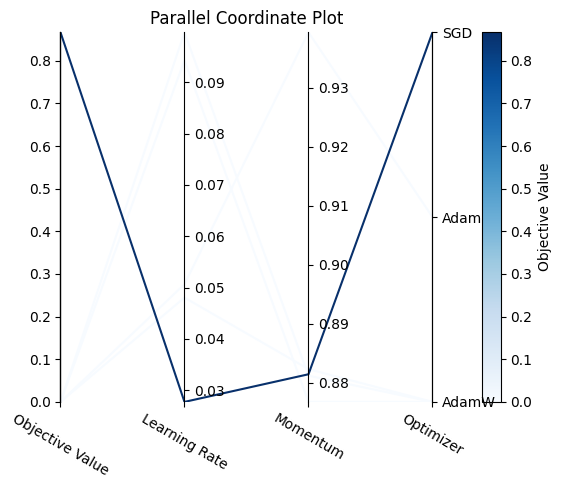

In [ ]:
optuna.visualization.matplotlib.plot_parallel_coordinate(study, params=['Optimizer', 'Learning Rate', 'Momentum'])